In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
from matplotlib import pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import spacy

import warnings
warnings.filterwarnings('ignore')

/Users/yutasugiyama/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import Dataset

In [2]:
# Import dataset
df = pd.read_csv("DatabreachesMA2007_2022.csv")

df

,Assigned Breach Number,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen
0,250,8/16/07,Hewlett Packard Company,Electronic,NaN,52.0,Yes,NaN,NaN,NaN,Yes,NaN,Yes
1,252,9/11/07,Kraft Foods,Electronic,NaN,460.0,Yes,NaN,NaN,NaN,Yes,NaN,Yes
2,244,9/12/07,The Hartford,Electronic,NaN,18.0,Yes,Yes,NaN,NaN,Yes,NaN,NaN
3,270,9/21/07,Symantec Corporation,Undefined,NaN,1.0,Yes,NaN,NaN,NaN,Yes,NaN,NaN
4,243,10/5/07,The Hartford,Electronic,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,28818,12/30/22,Wabtec Corporation,Electronic,Yes,7.0,Yes,NaN,Yes,NaN,Yes,NaN,NaN
22990,28817,12/30/22,City Enterprises LLC,Electronic,Yes,9.0,Yes,Yes,Yes,NaN,Yes,NaN,NaN
22991,28816,12/30/22,Adams Street Partners LLC,Electronic,NaN,6.0,Yes,Yes,Yes,NaN,Yes,NaN,NaN
22992,28814,12/30/22,Retreat Behavioral Health,Electronic,Yes,159.0,Yes,NaN,NaN,NaN,Yes,NaN,NaN


### Statistics

In [3]:
# Only numerical column
numerical_columns = df[["MA Residents Affected"]]

# Calculations
minimum = numerical_columns.min()
maximum = numerical_columns.max()
mean = numerical_columns.mean()
median = numerical_columns.median()
std_deviation = numerical_columns.std()


stat_table = pd.DataFrame({
    'Statistic': ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
    "MA Residents Affected": [minimum["MA Residents Affected"], maximum["MA Residents Affected"], mean["MA Residents Affected"], median["MA Residents Affected"], std_deviation["MA Residents Affected"]]
})

stat_table

,Statistic,MA Residents Affected
0,Minimum,0.000000e+00
1,Maximum,2.982421e+06
2,Mean,7.149007e+02
3,Median,3.000000e+00
4,Standard Deviation,2.419799e+04


### Plot of Data

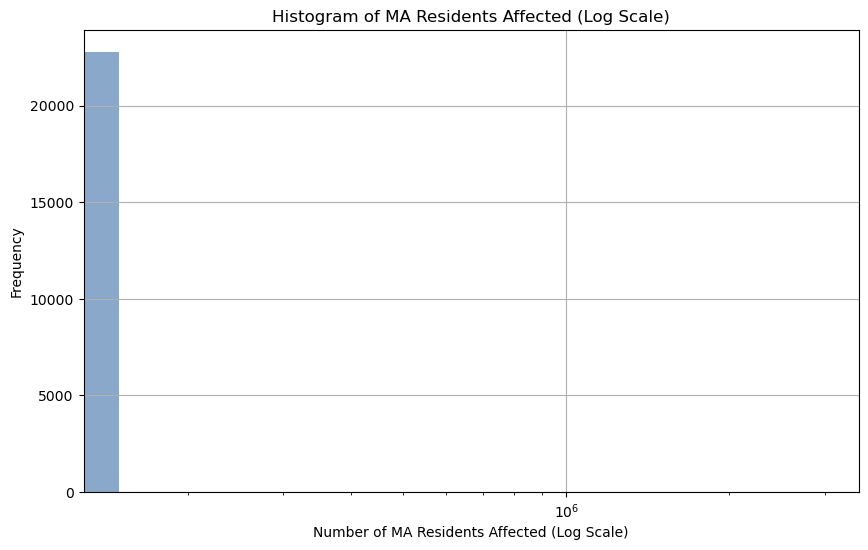

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df["MA Residents Affected"], bins=20, color="#8aa8ca")
plt.xlabel("Number of MA Residents Affected (Log Scale)")
plt.ylabel("Frequency")
plt.title("Histogram of MA Residents Affected (Log Scale)")
plt.grid(True)
plt.xscale("log")  
plt.show()

### Data Cleaning

In [5]:
# Making column with dates of data breaches quantifyable
df["Date Reported To OCA"] = pd.to_datetime(df["Date Reported To OCA"])

# Replacing NaN values to "No" due to assumption confirmation by dataset source.
df["Breach Occur at the Reporting Entity?"].fillna("No", inplace=True)

# Targeted Data
df["SSNBreached"].fillna("No", inplace=True)
df["Account Number Breached"].fillna("No", inplace=True)
df["Drivers Licenses Breached"].fillna("No", inplace=True)
df["Credit Debit Numbers Breached"].fillna("No", inplace=True)

# Security info about organization
df["Provided Credit Monitoring"].fillna("No", inplace=True)
df["Data Encrypted"].fillna("No", inplace=True)
df["Mobile Device Lost Stolen"].fillna("No", inplace=True)

# Drop rows with null data in this column these were confirmed as true null values
df.dropna(subset=["Breach Type Description"], inplace=True) 
df.dropna(subset=["MA Residents Affected"], inplace=True) 

# Drop unnecessary column
df.drop(columns=["Assigned Breach Number"], inplace=True)

df_state1 = df

df_state1

,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen
0,2007-08-16,Hewlett Packard Company,Electronic,No,52.0,Yes,No,No,No,Yes,No,Yes
1,2007-09-11,Kraft Foods,Electronic,No,460.0,Yes,No,No,No,Yes,No,Yes
2,2007-09-12,The Hartford,Electronic,No,18.0,Yes,Yes,No,No,Yes,No,No
3,2007-09-21,Symantec Corporation,Undefined,No,1.0,Yes,No,No,No,Yes,No,No
5,2007-10-09,Daymon Worldwide Inc.,Electronic,No,1416.0,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
22989,2022-12-30,Wabtec Corporation,Electronic,Yes,7.0,Yes,No,Yes,No,Yes,No,No
22990,2022-12-30,City Enterprises LLC,Electronic,Yes,9.0,Yes,Yes,Yes,No,Yes,No,No
22991,2022-12-30,Adams Street Partners LLC,Electronic,No,6.0,Yes,Yes,Yes,No,Yes,No,No
22992,2022-12-30,Retreat Behavioral Health,Electronic,Yes,159.0,Yes,No,No,No,Yes,No,No


### Outlier Detection and Handling

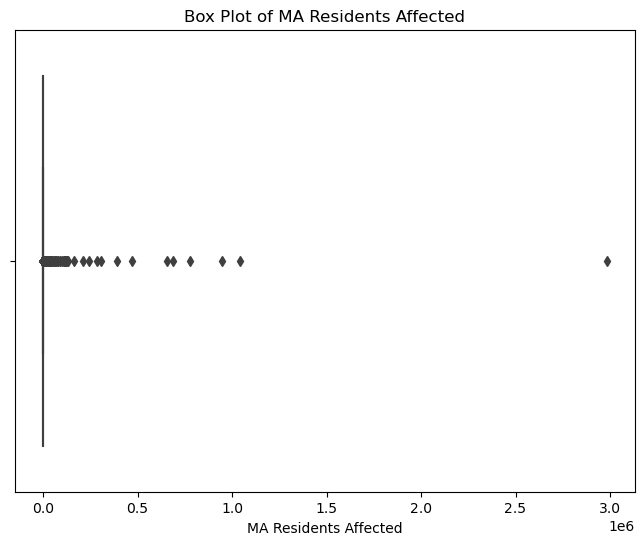

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded and contains the "MA Residents Affected" column
# If not, make sure to load the data first.

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["MA Residents Affected"])
plt.title("Box Plot of MA Residents Affected")
plt.xlabel("MA Residents Affected")

# Show the plot
plt.show()


In [7]:
# Detect the Outliers

# Finding IQR
#Q1 = df["MA Residents Affected"].quantile(0.25)
#Q3 = df["MA Residents Affected"].quantile(0.75)
#IQR = Q3 - Q1

# Defining a threshold for outliers
#threshold = 1.5 * IQR

# Isolating the outliers
#outliers = df[(df["MA Residents Affected"] < Q1 - threshold) | (df["MA Residents Affected"] > Q3 + threshold)]

##outliers

In [8]:
# Handling Outliers

# We are choosing to remove the outliers
#df = df[~((df["MA Residents Affected"] < Q1 - threshold) | (df["MA Residents Affected"] > Q3 + threshold))]



# In case it is better to replace the outliers with the MA residents affected with the median value
#median_value = df['MA Residents Affected'].median()

#df['MA Residents Affected'] = np.where(
#    (df['MA Residents Affected'] < Q1 - threshold) | (df['MA Residents Affected'] > Q3 + threshold),
#    median_value,df['MA Residents Affected'])

#df


def handle_outliers_iqr(data, column, lower_bound, upper_bound):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_outlier_bound = Q1 - IQR * lower_bound
    upper_outlier_bound = Q3 + IQR * upper_bound

    # Cap the outliers
    data[column] = np.where(data[column] < lower_outlier_bound, lower_outlier_bound, data[column])
    data[column] = np.where(data[column] > upper_outlier_bound, upper_outlier_bound, data[column])

    return data

# Set the lower and upper bounds for outliers (adjust as needed)
lower_bound = 1.5
upper_bound = 1.5

# Handle outliers in the MA Residents Affected column
df = handle_outliers_iqr(df, 'MA Residents Affected', lower_bound, upper_bound)

# Display the modified dataset with outliers handled
df


,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen
0,2007-08-16,Hewlett Packard Company,Electronic,No,41.0,Yes,No,No,No,Yes,No,Yes
1,2007-09-11,Kraft Foods,Electronic,No,41.0,Yes,No,No,No,Yes,No,Yes
2,2007-09-12,The Hartford,Electronic,No,18.0,Yes,Yes,No,No,Yes,No,No
3,2007-09-21,Symantec Corporation,Undefined,No,1.0,Yes,No,No,No,Yes,No,No
5,2007-10-09,Daymon Worldwide Inc.,Electronic,No,41.0,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
22989,2022-12-30,Wabtec Corporation,Electronic,Yes,7.0,Yes,No,Yes,No,Yes,No,No
22990,2022-12-30,City Enterprises LLC,Electronic,Yes,9.0,Yes,Yes,Yes,No,Yes,No,No
22991,2022-12-30,Adams Street Partners LLC,Electronic,No,6.0,Yes,Yes,Yes,No,Yes,No,No
22992,2022-12-30,Retreat Behavioral Health,Electronic,Yes,41.0,Yes,No,No,No,Yes,No,No


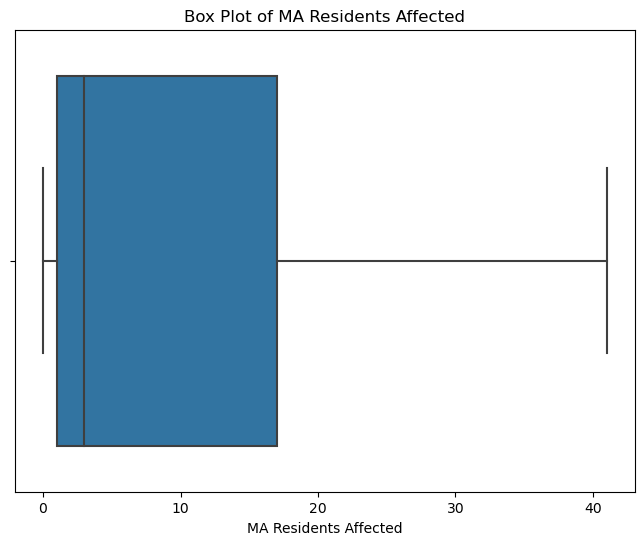

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded and contains the "MA Residents Affected" column
# If not, make sure to load the data first.

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["MA Residents Affected"])
plt.title("Box Plot of MA Residents Affected")
plt.xlabel("MA Residents Affected")

# Show the plot
plt.show()


### New Statistics Table!

In [10]:
# Only numerical column
numerical_columns = df[["MA Residents Affected"]]

# Calculations
minimum = numerical_columns.min()
maximum = numerical_columns.max()
mean = numerical_columns.mean()
median = numerical_columns.median()
std_deviation = numerical_columns.std()


new_stat_table = pd.DataFrame({
    "Statistic": ["Minimum", "Maximum", "Mean", "Median", "Standard Deviation"],
    "MA Residents Affected": [minimum["MA Residents Affected"], maximum["MA Residents Affected"], mean["MA Residents Affected"], median["MA Residents Affected"], std_deviation["MA Residents Affected"]]
})

new_stat_table

,Statistic,MA Residents Affected
0,Minimum,0.000000
1,Maximum,41.000000
2,Mean,11.608176
3,Median,3.000000
4,Standard Deviation,15.386515


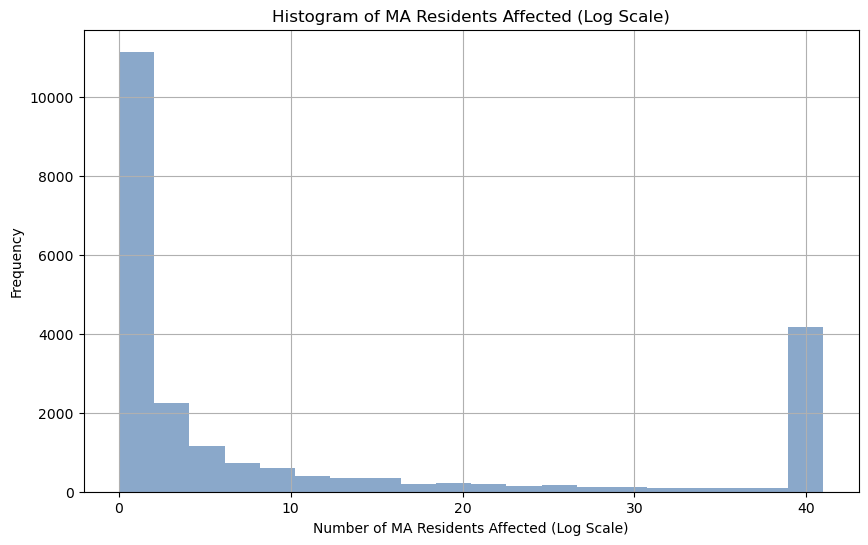

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df["MA Residents Affected"], bins=20, color="#8aa8ca")
plt.xlabel("Number of MA Residents Affected (Log Scale)")
plt.ylabel("Frequency")
plt.title("Histogram of MA Residents Affected (Log Scale)")
plt.grid(True)
plt.show()

### Data Transformation

In [12]:
#Categorical Encoding for Boolean columns

# If breach occured at entity
df["Breach Occur at the Reporting Entity?"] = df["Breach Occur at the Reporting Entity?"].apply(lambda x: True if x == "Yes" else False)

# Targeted data
df["SSNBreached"] = df["SSNBreached"].apply(lambda x: True if x == "Yes" else False)
df["Account Number Breached"] = df["Account Number Breached"].apply(lambda x: True if x == "Yes" else False)
df["Drivers Licenses Breached"] = df["Drivers Licenses Breached"].apply(lambda x: True if x == "Yes" else False)
df["Credit Debit Numbers Breached"] = df["Credit Debit Numbers Breached"].apply(lambda x: True if x == "Yes" else False)

# Security info about organization
df["Provided Credit Monitoring"] = df["Provided Credit Monitoring"].apply(lambda x: True if x == "Yes" else False)
df["Data Encrypted"] = df["Data Encrypted"].apply(lambda x: True if x == "Yes" else False)
df["Mobile Device Lost Stolen"] = df["Mobile Device Lost Stolen"].apply(lambda x: True if x == "Yes" else False)


In [13]:

import pandas as pd
from collections import Counter

# Assuming you have a DataFrame called 'df' with a column 'Organization Name'
# Load your data into the 'df' DataFrame, for example:
# df = pd.read_csv('your_data.csv')

# Ensure all entries in the 'Organization Name' column are strings (convert them if necessary)
df['Organization Name'] = df['Organization Name'].astype(str)

# Concatenate all the organization names into a single string
all_organization_names = ' '.join(df['Organization Name'])

# Split the concatenated string into words and count their frequency
word_counts = Counter(all_organization_names.split())

# Find the top 100 keywords with the largest frequency, including their counts
top_100_keywords_with_counts = word_counts.most_common(100)

# Print the top 100 keywords and their counts
for keyword, count in top_100_keywords_with_counts:
    print(f'{keyword}: {count}')


Bank: 6554
Inc.: 2680
of: 2003
The: 2001
Savings: 1373
LLC: 1338
American: 1300
Express: 1184
Company: 1138
Eastern: 993
Services: 987
Cape: 937
Cod: 928
Cooperative: 906
Five: 867
&: 845
Credit: 797
Union: 786
One: 763
Mutual: 728
Trust: 705
Travel: 620
Rockland: 619
Inc: 615
Related: 607
St.: 598
Village: 570
Financial: 554
Mary's: 525
Insurance: 518
Salem: 459
Company,: 451
Health: 450
and: 435
Group: 409
Savers: 407
Corporation: 406
Hospital: 398
Cents: 373
Community: 340
Discover: 332
Street: 331
University: 316
Webster: 312
Massachusetts: 309
Life: 305
Watertown: 290
Medical: 277
Main: 271
N.A.: 259
Pilgrim: 252
Services,: 250
Center: 249
America: 249
Eagle: 230
County: 223
College: 221
BANK: 218
Adams: 214
Bank,: 205
Group,: 199
Commonwealth: 195
Management: 195
Capital: 187
Bristol: 184
State: 177
National: 169
School: 168
LLP: 158
Department: 158
Investments: 156
Fidelity: 155
General: 154
Vanguard: 154
d/b/a: 154
MA: 147
New: 133
Care: 133
-: 129
Association: 127
dba: 122
SAV

In [17]:
nlp = spacy.load("en_core_web_sm")

# Function to categorize organizations based on keywords
def categorize_organization(name):
    name = str(name)  # Ensure the value is a string
    doc = nlp(name.lower())  # Tokenize and lowercase the organization name
    categories = set()  # Use a set to store unique categories

    # Define categories and their keywords
    category_keywords = {
        "Corporation": ["corporation", "company", "inc", "co", "corp", "llc", "llp", "lp", "firm", "ltd", "international", "incorporated", "partners", "services", "worldwide", "holdings", "industries", "enterprise", "group", "org", "savers", "organization", "services", "management", "ventures", "Davidson", "foundation", "kiwanis", "savings", "YMCA", "united way", "museum", "JP", "Aon"],
        "Technology": ["tec", "facebook", "intel", "systems", "google", "oracle", "hewlett", "comcast", "verizon", "AT&T", "TomTom", "Synopsys", "network", "energy", "power", "exelon"],
        "Healthcare": ["medicine","hostpital", "health", "credit union", "financial", "pfizer", "genentech", "gilead", "sciences", "medical", "care"],
        "Finance": ["bank", "discover", "finance", "credit union", "financial", "capital", "investment", "mortgage", "securities", "fund", "financial", "sales", "marketing", "wells fargo", "citi", "H&R Block", "hartford", "mutual", "aetna", "blue cross", "genworth", "insurance", "express"],
        "Education": ["university", "college", "school", "education", "university", "college", "school", "academy", "institute", "MIT"],
    }

    # Check for keywords in the organization name
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in doc.text:
                categories.add(category)  # Add the category to the set

#    for category, keywords in category_keywords.items():
#        if any(keyword in name.lower() for keyword in keywords):
#            return category

#    return "Other"

    # If no category is found, assign "Other"
    if not categories:
        categories.add("Other")

    return ", ".join(categories)

# Apply the categorize_organization function to the DataFrame
df["Organization Categories"] = df["Organization Name"].apply(categorize_organization)

df

,Date Reported To OCA,Organization Name,Breach Type Description,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Organization Categories
0,2007-08-16,Hewlett Packard Company,Electronic,False,41.0,True,False,False,False,True,False,True,"Corporation, Technology"
1,2007-09-11,Kraft Foods,Electronic,False,41.0,True,False,False,False,True,False,True,Other
2,2007-09-12,The Hartford,Electronic,False,18.0,True,True,False,False,True,False,False,Finance
3,2007-09-21,Symantec Corporation,Undefined,False,1.0,True,False,False,False,True,False,False,"Corporation, Technology"
5,2007-10-09,Daymon Worldwide Inc.,Electronic,False,41.0,True,False,False,False,False,False,False,Corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,2022-12-30,Wabtec Corporation,Electronic,True,7.0,True,False,True,False,True,False,False,"Corporation, Technology"
22990,2022-12-30,City Enterprises LLC,Electronic,True,9.0,True,True,True,False,True,False,False,Corporation
22991,2022-12-30,Adams Street Partners LLC,Electronic,False,6.0,True,True,True,False,True,False,False,Corporation
22992,2022-12-30,Retreat Behavioral Health,Electronic,True,41.0,True,False,False,False,True,False,False,Healthcare


In [18]:
# Categorical Encoding for categorical columns
cat_encoder = OneHotEncoder()

codes = cat_encoder.fit_transform(df[["Breach Type Description"]])
names = cat_encoder.get_feature_names_out()
codes_df = pd.DataFrame(codes.todense(), columns=names)
df1 = df.drop(["Breach Type Description"], axis=1)
df = pd.merge(codes_df, df1, left_index=True, right_index=True)

df

,Breach Type Description_Both,Breach Type Description_Electronic,Breach Type Description_Paper,Breach Type Description_Undefined,Date Reported To OCA,Organization Name,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Organization Categories
0,0.0,1.0,0.0,0.0,2007-08-16,Hewlett Packard Company,False,41.0,True,False,False,False,True,False,True,"Corporation, Technology"
1,0.0,1.0,0.0,0.0,2007-09-11,Kraft Foods,False,41.0,True,False,False,False,True,False,True,Other
2,0.0,1.0,0.0,0.0,2007-09-12,The Hartford,False,18.0,True,True,False,False,True,False,False,Finance
3,0.0,0.0,0.0,1.0,2007-09-21,Symantec Corporation,False,1.0,True,False,False,False,True,False,False,"Corporation, Technology"
5,0.0,1.0,0.0,0.0,2007-10-09,Daymon Worldwide Inc.,False,41.0,True,False,False,False,False,False,False,Corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22671,0.0,1.0,0.0,0.0,2022-11-01,MA Department of Revenue,True,1.0,True,False,False,False,True,False,False,Other
22672,0.0,1.0,0.0,0.0,2022-11-01,MutualOne Bank,False,1.0,False,False,False,True,False,False,False,Finance
22673,0.0,1.0,0.0,0.0,2022-11-01,MutualOne Bank,False,1.0,False,False,False,True,False,False,False,Finance
22674,0.0,1.0,0.0,0.0,2022-11-01,MutualOne Bank,False,1.0,False,False,False,True,False,False,False,Finance


### EDA

#### Facet plot of Target Data

In [19]:
# Filter data for each breach type
#drivers_compromised = df_state1[df_state1["Drivers Licenses Breached"] == "Yes"]
#account_compromised = df_state1[df_state1["Account Number Breached"] == "Yes"]
#credit_debit_compromised = df_state1[df_state1["Credit Debit Numbers Breached"] == "Yes"]
#ssn_breached = df_state1[df_state1["SSNBreached"] == "Yes"]

# Count the number of breaches by breach type
#drivers_counts = drivers_compromised["Breach Type Description"].value_counts()
#account_counts = account_compromised["Breach Type Description"].value_counts()
#credit_debit_counts = credit_debit_compromised["Breach Type Description"].value_counts()
#ssn_breached_counts = ssn_breached["Breach Type Description"].value_counts()

# Combine the counts into a single DataFrame
#combined_counts = pd.DataFrame({
#    "Breach Type": ["Drivers Licenses"] * len(drivers_counts) +
#                   ["Account Numbers"] * len(account_counts) +
#                   ["Credit Debit Numbers"] * len(credit_debit_counts) +
#                   ["SSN"] * len(ssn_breached_counts),
#    "Breach Type Description": list(drivers_counts.index) + list(account_counts.index) + list(credit_debit_counts.index) + list(ssn_breached_counts.index),
#    "Number of Breaches": list(drivers_counts) + list(account_counts) + list(credit_debit_counts) + list(ssn_breached_counts)
#})

# Set the figure size to make the plots larger
#plt.figure(figsize=(30, 10))  # Adjust the figure size accordingly

# Create a facet plot with shorter titles and a single line of facets
#g = sns.FacetGrid(combined_counts, col="Breach Type", col_wrap=len(combined_counts["Breach Type"].unique()), sharex=False)
#g.map_dataframe(sns.barplot, x="Breach Type Description", y="Number of Breaches", palette="Paired", ci=None)  # Add ci=None to remove error bars
#g.set_axis_labels("Breach Type", "Number of Breaches (Log Scale)")
#g.set_titles("{col_name}")
#g.set(yscale="log")
#g.set_xticklabels(rotation=45)

#### Distribution of Breach Occurences by Year

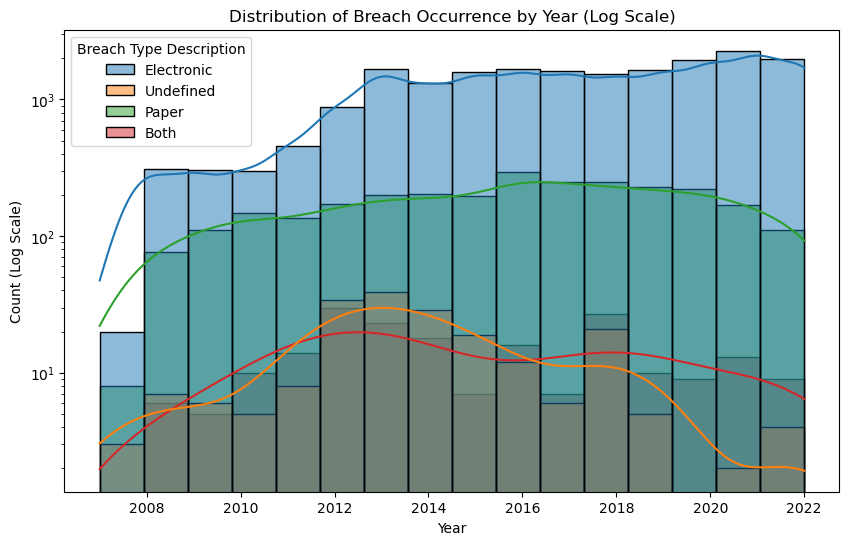

In [20]:
df_state1["Year"] = df_state1["Date Reported To OCA"].dt.year

# Create the histogram plot with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))
sns.histplot(data=df_state1, x="Year", bins=16, kde=True, hue="Breach Type Description")
plt.yscale("log")  # Set the y-axis to logarithmic scale
plt.title("Distribution of Breach Occurrence by Year (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Count (Log Scale)")
plt.show()

#### Percentage of Organization Providing Credit Monitoring

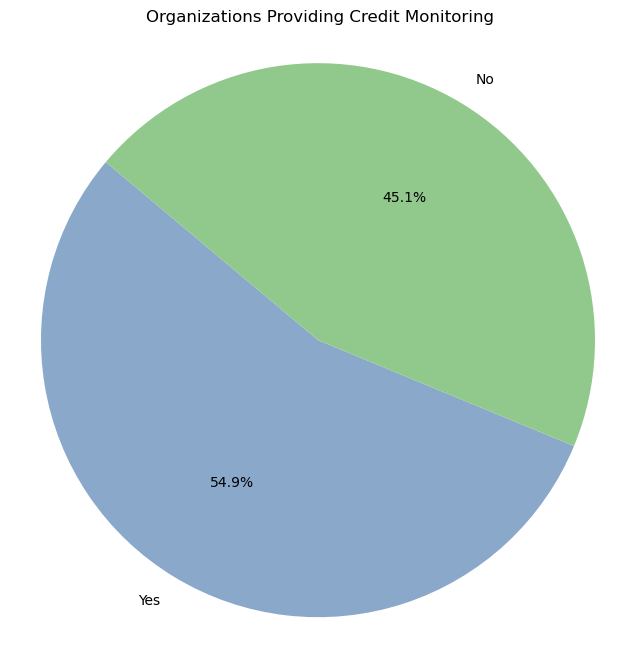

In [21]:
plt.figure(figsize=(8, 8))
colors = ["#8aa8ca", "#91c98d"]
labels = ["Yes", "No"]
sizes = df_state1["Provided Credit Monitoring"].value_counts()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Organizations Providing Credit Monitoring")
plt.axis("equal")
plt.show()

#### Bar Chart of Encryption Status Count

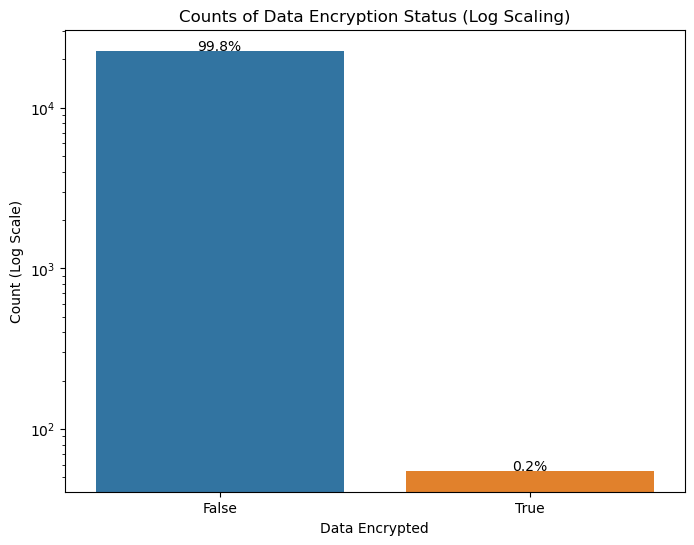

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_state1, x="Data Encrypted")
plt.yscale("log")
plt.title("Counts of Data Encryption Status (Log Scaling)")
plt.xlabel("Data Encrypted")
plt.ylabel("Count (Log Scale)")

# Add percentages for each bar
total = len(df_state1)  # Total number of data points

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

#### Bar Chart of Mobile Device Lost or Stolen

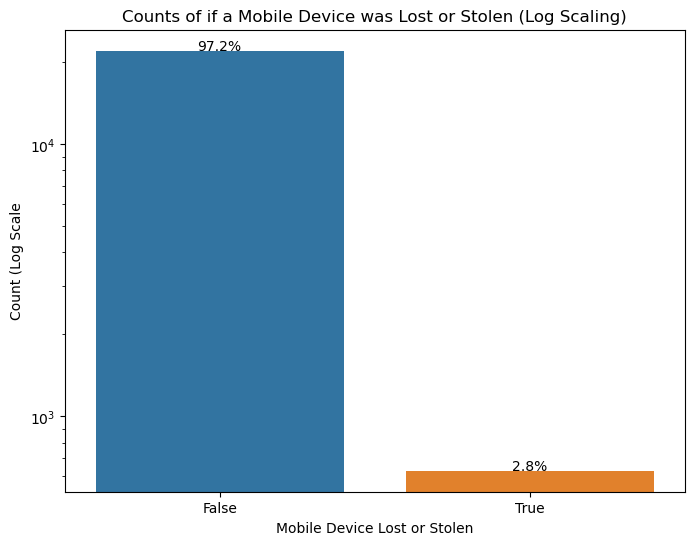

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_state1, x="Mobile Device Lost Stolen")
plt.yscale("log")
plt.title("Counts of if a Mobile Device was Lost or Stolen (Log Scaling)")
plt.xlabel("Mobile Device Lost or Stolen")
plt.ylabel("Count (Log Scale")

# Calculate and annotate percentages
total = len(df_state1)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

### Modeling

In [24]:
dfm1 = df
df.to_csv('df_final.csv')

dfm1

,Breach Type Description_Both,Breach Type Description_Electronic,Breach Type Description_Paper,Breach Type Description_Undefined,Date Reported To OCA,Organization Name,Breach Occur at the Reporting Entity?,MA Residents Affected,SSNBreached,Account Number Breached,Drivers Licenses Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen,Organization Categories
0,0.0,1.0,0.0,0.0,2007-08-16,Hewlett Packard Company,False,41.0,True,False,False,False,True,False,True,"Corporation, Technology"
1,0.0,1.0,0.0,0.0,2007-09-11,Kraft Foods,False,41.0,True,False,False,False,True,False,True,Other
2,0.0,1.0,0.0,0.0,2007-09-12,The Hartford,False,18.0,True,True,False,False,True,False,False,Finance
3,0.0,0.0,0.0,1.0,2007-09-21,Symantec Corporation,False,1.0,True,False,False,False,True,False,False,"Corporation, Technology"
5,0.0,1.0,0.0,0.0,2007-10-09,Daymon Worldwide Inc.,False,41.0,True,False,False,False,False,False,False,Corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22671,0.0,1.0,0.0,0.0,2022-11-01,MA Department of Revenue,True,1.0,True,False,False,False,True,False,False,Other
22672,0.0,1.0,0.0,0.0,2022-11-01,MutualOne Bank,False,1.0,False,False,False,True,False,False,False,Finance
22673,0.0,1.0,0.0,0.0,2022-11-01,MutualOne Bank,False,1.0,False,False,False,True,False,False,False,Finance
22674,0.0,1.0,0.0,0.0,2022-11-01,MutualOne Bank,False,1.0,False,False,False,True,False,False,False,Finance


#### Model 

Logistic Regression with feature scaling and undersampling

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Load your data (replace this with your actual data loading code)
# dfm1 = pd.read_csv("your_data.csv")

# Define your features and target variable
target = dfm1["Organization Categories"]
features = [
    "Breach Type Description_Both",
    "Breach Type Description_Electronic",
    "Breach Type Description_Paper",
    "SSNBreached",
    "Account Number Breached",
    "Drivers Licenses Breached",
    "Credit Debit Numbers Breached",
    "Provided Credit Monitoring",
    "Data Encrypted",
    "Mobile Device Lost Stolen",
    "MA Residents Affected"
]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dfm1[features], target, test_size=0.2, random_state=200)

# Undersample the majority classes using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=200)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Scale the features
scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression(max_iter=100, C=100)
lr.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the train and test data
y_train_pred = lr.predict(X_train_resampled_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Denormalize the features for both train and test datasets
X_train_denormalized = scaler.inverse_transform(X_train_resampled_scaled)
X_test_denormalized = scaler.inverse_transform(X_test_scaled)

# For example, you can calculate accuracy and classification reports for denormalized data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_classification_report = classification_report(y_train_resampled, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_classification_report)

# Similarly, calculate accuracy and classification reports for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_report)

''''
# Subplots for precision, recall, and F1-score
plt.figure(figsize=(12, 6))

# Precision
plt.subplot(131)
plt.barh(classes, train_precision, color='skyblue', label='Training', alpha=0.6)
plt.barh(classes, test_precision, color='salmon', label='Test', alpha=0.6)
plt.xlabel('Precision')
plt.title('Precision')
plt.legend()

# Recall
plt.subplot(132)
plt.barh (classes, train_recall, color='skyblue', label='Training', alpha=0.6)
plt.barh(classes, test_recall, color='salmon', label='Test', alpha=0.6)
plt.xlabel('Recall')
plt.title('Recall')
plt.legend()

# F1-score
plt.subplot(133)
plt.barh(classes, train_f1, color='skyblue', label='Training', alpha=0.6)
plt.barh(classes, test_f1, color='salmon', label='Test', alpha=0.6)
plt.xlabel('F1-Score')
plt.title('F1-Score')
plt.legend()

plt.tight_layout()
plt.show()
'''

Training Accuracy: 0.56
Training Classification Report:
                                              precision    recall  f1-score   support

                                 Corporation       1.00      0.50      0.67         2
                        Corporation, Finance       1.00      1.00      1.00         2
            Corporation, Finance, Technology       0.50      0.50      0.50         2
                     Corporation, Technology       0.00      0.00      0.00         2
                                   Education       1.00      0.50      0.67         2
                      Education, Corporation       0.67      1.00      0.80         2
             Education, Corporation, Finance       0.67      1.00      0.80         2
          Education, Corporation, Technology       0.00      0.00      0.00         2
                          Education, Finance       0.40      1.00      0.57         2
                       Education, Technology       1.00      0.50      0.67        

"'\n# Subplots for precision, recall, and F1-score\nplt.figure(figsize=(12, 6))\n\n# Precision\nplt.subplot(131)\nplt.barh(classes, train_precision, color='skyblue', label='Training', alpha=0.6)\nplt.barh(classes, test_precision, color='salmon', label='Test', alpha=0.6)\nplt.xlabel('Precision')\nplt.title('Precision')\nplt.legend()\n\n# Recall\nplt.subplot(132)\nplt.barh (classes, train_recall, color='skyblue', label='Training', alpha=0.6)\nplt.barh(classes, test_recall, color='salmon', label='Test', alpha=0.6)\nplt.xlabel('Recall')\nplt.title('Recall')\nplt.legend()\n\n# F1-score\nplt.subplot(133)\nplt.barh(classes, train_f1, color='skyblue', label='Training', alpha=0.6)\nplt.barh(classes, test_f1, color='salmon', label='Test', alpha=0.6)\nplt.xlabel('F1-Score')\nplt.title('F1-Score')\nplt.legend()\n\nplt.tight_layout()\nplt.show()\n"

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler  # Use RandomOverSampler for oversampling
import numpy as np

# Load your data (replace this with your actual data loading code)
# dfm1 = pd.read_csv("your_data.csv")

# Define your features and target variable
target = dfm1["Organization Categories"]
features = [
    "Breach Type Description_Both",
    "Breach Type Description_Electronic",
    "Breach Type Description_Paper",
    "SSNBreached",
    "Account Number Breached",
    "Drivers Licenses Breached",
    "Credit Debit Numbers Breached",
    "Provided Credit Monitoring",
    "Data Encrypted",
    "Mobile Device Lost Stolen",
    "MA Residents Affected"
]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dfm1[features], target, test_size=0.2, random_state=200)

# Oversample the minority classes using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=200)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Scale the features
scaler = MinMaxScaler()
X_train_oversampled_scaled = scaler.fit_transform(X_train_oversampled)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=200)
rf.fit(X_train_oversampled_scaled, y_train_oversampled)

# Make predictions on the train and test data
y_train_pred = rf.predict(X_train_oversampled_scaled)
y_test_pred = rf.predict(X_test_scaled)

# Denormalize the features for both train and test datasets
X_train_denormalized = scaler.inverse_transform(X_train_oversampled_scaled)
X_test_denormalized = scaler.inverse_transform(X_test_scaled)

# Perform further analysis or print classification reports, accuracy, etc. if needed
# ...

# For example, you can calculate accuracy and classification reports for denormalized data
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred)
train_classification_report = classification_report(y_train_oversampled, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_classification_report)

# Similarly, calculate accuracy and classification reports for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_report)


Training Accuracy: 0.5137336093857833
Training Classification Report:
                                              precision    recall  f1-score   support

                                 Corporation       0.69      0.11      0.19      4347
                        Corporation, Finance       0.33      0.16      0.22      4347
            Corporation, Finance, Technology       0.67      0.54      0.59      4347
                     Corporation, Technology       0.44      0.36      0.40      4347
                                   Education       0.55      0.24      0.33      4347
                      Education, Corporation       0.57      0.30      0.39      4347
             Education, Corporation, Finance       0.85      1.00      0.92      4347
          Education, Corporation, Technology       0.62      0.68      0.65      4347
                          Education, Finance       0.47      1.00      0.64      4347
                       Education, Technology       0.67      0.59    

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

# Load your data (replace this with your actual data loading code)
# dfm1 = pd.read_csv("your_data.csv")

# Define your features and target variable
target = dfm1["Organization Categories"]
features = [
    "Breach Type Description_Both",
    "Breach Type Description_Electronic",
    "Breach Type Description_Paper",
    "SSNBreached",
    "Account Number Breached",
    "Drivers Licenses Breached",
    "Credit Debit Numbers Breached",
    "Provided Credit Monitoring",
    "Data Encrypted",
    "Mobile Device Lost Stolen",
    "MA Residents Affected"
]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dfm1[features], target, test_size=0.5, random_state=50)

# Oversample the minority classes using RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'all', random_state=50)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Scale the features
scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=50)
dt_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the train and test data
y_train_pred = dt_classifier.predict(X_train_resampled_scaled)
y_test_pred = dt_classifier.predict(X_test_scaled)

# Denormalize the features for both train and test datasets
X_train_denormalized = scaler.inverse_transform(X_train_resampled_scaled)
X_test_denormalized = scaler.inverse_transform(X_test_scaled)


# For example, you can calculate accuracy and classification reports for denormalized data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_classification_report = classification_report(y_train_resampled, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_classification_report)

# Similarly, calculate accuracy and classification reports for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_report)


Training Accuracy: 0.5874825433921396
Training Classification Report:
                                              precision    recall  f1-score   support

                                 Corporation       0.67      0.15      0.25      2699
                        Corporation, Finance       0.35      0.18      0.23      2699
            Corporation, Finance, Technology       0.32      0.85      0.47      2699
                     Corporation, Technology       0.64      0.42      0.51      2699
                                   Education       0.52      0.33      0.41      2699
                      Education, Corporation       0.57      0.32      0.41      2699
             Education, Corporation, Finance       0.99      1.00      1.00      2699
          Education, Corporation, Technology       0.40      0.74      0.52      2699
                          Education, Finance       0.85      1.00      0.92      2699
                       Education, Technology       0.61      0.64    